In [20]:
import pandas as pd
import numpy as np

In [21]:
# read the dataset
df = pd.read_csv('Salary_Data.csv')

In [22]:
# Take a look of dataset
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


* We can see easily there are two columns are present in this dataset.

In [4]:
# Let's search datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


* We found that total number of non-null value in each columns are 30. The datatypes of both columns are float64.

In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
# Let's search for null values if any present in dataset
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

* We can see there is no any null value present in this dataset.

In [7]:
# Let's check for duplicates.
df.duplicated().sum()

0

* We can see there is no any duplicate rows present in this dataset.

In [8]:
# Import visualization library
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

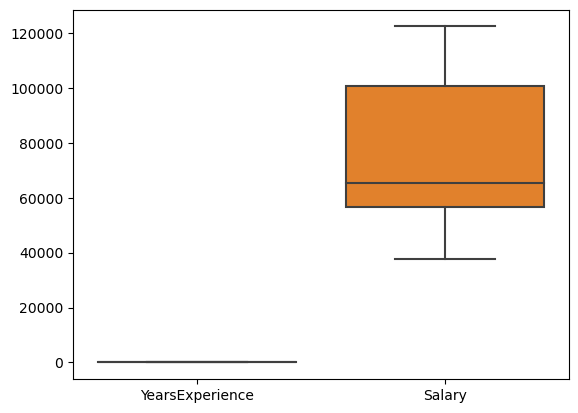

In [9]:
sns.boxplot(df)

* There is no any outlier present in this dataset

In [10]:
import warnings
warnings.filterwarnings("ignore")

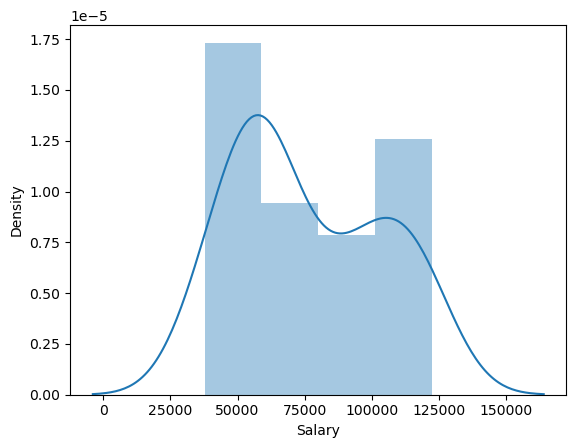

In [11]:
# Let's check the distribution of the data
sns.distplot(df['Salary'])
plt.show()

In [12]:
import statsmodels.formula.api as sm

In [13]:
model1 = sm.ols('Salary ~ YearsExperience', data=df).fit()

In [14]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           1.14e-20
Time:                        09:33:20   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

### 1. log transformation

In [23]:
df['Salary_log'] = np.log(df['Salary'])

In [24]:
df.head()

,YearsExperience,Salary,Salary_log
0,1.1,39343.0,10.580073
1,1.3,46205.0,10.740843
2,1.5,37731.0,10.538237
3,2.0,43525.0,10.681091
4,2.2,39891.0,10.593906


### Let's train the model

In [25]:
model2 = sm.ols('Salary_log ~ YearsExperience', data=df).fit()

In [26]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Salary_log   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           7.03e-18
Time:                        09:44:24   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Square root transformation

In [27]:
df['Salary_sqrt'] = np.sqrt(df['Salary'])

In [28]:
df.head()

,YearsExperience,Salary,Salary_log,Salary_sqrt
0,1.1,39343.0,10.580073,198.350700
1,1.3,46205.0,10.740843,214.953483
2,1.5,37731.0,10.538237,194.244691
3,2.0,43525.0,10.681091,208.626460
4,2.2,39891.0,10.593906,199.727314


In [59]:
# Let's train the model
model3 = sm.ols('Salary_sqrt~ YearsExperience', data=df).fit()

In [60]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Salary_sqrt   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     530.2
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           9.78e-20
Time:                        10:10:22   Log-Likelihood:                -114.33
No. Observations:                  30   AIC:                             232.7
Df Residuals:                      28   BIC:                             235.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         180.7002      4.446     40.646      0.000     171.594     189.807
YearsExperience    17.0565      0.741     23.025      0.000      15.539      18.574
==============================================================================
Omnibus:                        2.621   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.906
Skew:                           0.439   Prob(JB):                        0.386
Kurtosis:                       2.131   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. Minmax scaler transformer

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scl = MinMaxScaler()

In [39]:
df['Salary_minmax'] = scl.fit_transform(df[['Salary']])

In [40]:
df.head()

,YearsExperience,Salary,Salary_log,Salary_sqrt,Salary_minmax
0,1.1,39343.0,10.580073,198.350700,0.019041
1,1.3,46205.0,10.740843,214.953483,0.100094
2,1.5,37731.0,10.538237,194.244691,0.000000
3,2.0,43525.0,10.681091,208.626460,0.068438
4,2.2,39891.0,10.593906,199.727314,0.025514


In [42]:
model4 = sm.ols('Salary_minmax ~ YearsExperience', data=df).fit()

In [43]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Salary_minmax   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           1.14e-20
Time:                        09:52:51   Log-Likelihood:                 38.951
No. Observations:                  30   AIC:                            -73.90
Df Residuals:                      28   BIC:                            -71.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1410      0.027     -5.252      0.000      -0.196      -0.086
YearsExperience     0.1116      0.004     24.950      0.000       0.102       0.121
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4. Standardization

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scl = StandardScaler()

In [47]:
df['Salary_std'] = scl.fit_transform(df[['Salary']])

In [48]:
df.head()

,YearsExperience,Salary,Salary_log,Salary_sqrt,Salary_minmax,Salary_std
0,1.1,39343.0,10.580073,198.350700,0.019041,-1.360113
1,1.3,46205.0,10.740843,214.953483,0.100094,-1.105527
2,1.5,37731.0,10.538237,194.244691,0.000000,-1.419919
3,2.0,43525.0,10.681091,208.626460,0.068438,-1.204957
4,2.2,39891.0,10.593906,199.727314,0.025514,-1.339781


In [49]:
model5 = sm.ols('Salary_std ~ YearsExperience', data=df).fit()

In [50]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Salary_std   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           1.14e-20
Time:                        09:58:01   Log-Likelihood:                 4.6151
No. Observations:                  30   AIC:                            -5.230
Df Residuals:                      28   BIC:                            -2.428
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.8629      0.084    -22.090      0.000      -2.036      -1.690
YearsExperience     0.3506      0.014     24.950      0.000       0.322       0.379
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5. Cube transformation

In [51]:
df['Salary_cube'] = df['Salary']**(1/3)

In [52]:
df.head()

,YearsExperience,Salary,Salary_log,Salary_sqrt,Salary_minmax,Salary_std,Salary_cube
0,1.1,39343.0,10.580073,198.350700,0.019041,-1.360113,34.011242
1,1.3,46205.0,10.740843,214.953483,0.100094,-1.105527,35.883626
2,1.5,37731.0,10.538237,194.244691,0.000000,-1.419919,33.540235
3,2.0,43525.0,10.681091,208.626460,0.068438,-1.204957,35.175984
4,2.2,39891.0,10.593906,199.727314,0.025514,-1.339781,34.168426


In [53]:
model6 = sm.ols('Salary_cube ~ YearsExperience', data=df).fit()

In [54]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Salary_cube   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     482.5
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           3.42e-19
Time:                        10:01:23   Log-Likelihood:                -47.463
No. Observations:                  30   AIC:                             98.93
Df Residuals:                      28   BIC:                             101.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          32.4539      0.479     67.821      0.000      31.474      33.434
YearsExperience     1.7515      0.080     21.966      0.000       1.588       1.915
==============================================================================
Omnibus:                        2.131   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                1.611
Skew:                           0.385   Prob(JB):                        0.447
Kurtosis:                       2.166   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
metrics_df = pd.DataFrame(data=[[model1.rsquared,model1.rsquared_adj,model1.mse_total],
                   [model2.rsquared,model2.rsquared_adj,model2.mse_total],
                  [model3.rsquared,model3.rsquared_adj,model3.mse_total],
                  [model4.rsquared,model4.rsquared_adj,model4.mse_total],
                  [model5.rsquared,model5.rsquared_adj,model5.mse_total],
                  [model6.rsquared,model6.rsquared_adj,model6.mse_total]],
            columns=['rsquared','rsquared_adj','mse_total'],
            index=['model1','model2','model3','model4','model5','model6'])

In [77]:
metrics_df

,rsquared,rsquared_adj,mse_total
model1,0.956957,0.955419,7.515510e+08
model2,0.949835,0.948044,2.466742e+03
model3,0.949835,0.948044,2.466742e+03
model4,0.956957,0.955419,1.048581e-01
model5,0.956957,0.955419,1.034483e+00
model6,0.945153,0.943194,2.613931e+01


In [74]:
 metrics_df[metrics_df['rsquared']==metrics_df['rsquared'].max()]

,rsquared,rsquared_adj
model1,0.956957,0.955419
model4,0.956957,0.955419
model5,0.956957,0.955419


In [75]:
 metrics_df[metrics_df['rsquared_adj']==metrics_df['rsquared_adj'].max()]

,rsquared,rsquared_adj
model1,0.956957,0.955419
model4,0.956957,0.955419
model5,0.956957,0.955419


In [78]:
 metrics_df[metrics_df['mse_total']==metrics_df['mse_total'].min()]

,rsquared,rsquared_adj,mse_total
model4,0.956957,0.955419,0.104858


### Conclusion:
* I have tried different model with different transformation of target variable.
* rsquared and rsquared_adj are equal for model1, model4 and model5
* On the basis of mse_total I selected model4 because model4 have miniimum mse_total 
* So, model4 is performed well.